<br>
<br>

<p style="font-size: 30px; text-align: center; "><b>Predicting Analysis Cardiovaskular Disease</b></p>

<br>
<br>

Nama    : Muhammad Reesa Rosyid

Email   : mreesa669@gmail.com

<h1 align='center'>Project Domain</h1>

***

## Background

Prakiraan epidemiologi menunjukkan akan terjadi lonjakan global penyakit kardiovaskular, dengan meningkatnya jumlah individu yang berisiko tinggi, karena studi kohort baru-baru ini mengungkapkan bahwa sangat sedikit, sekitar 2% hingga 7%, pada populasi umum yang tidak memiliki faktor risiko, sementara lebih dari 70% individu yang berisiko menunjukkan beberapa faktor risiko [1]. Kejadian kardiovaskular tradisional terutama didorong oleh faktor risiko yang dapat dimodifikasi seperti hipertensi, dislipidemia, diabetes, merokok, obesitas, perilaku kurang gerak, dan riwayat keluarga dengan penyakit kardiovaskular. Meskipun pengelolaan faktor-faktor ini diketahui dapat menurunkan prevalensi penyakit kardiovaskular dan angka kematian terkait secara signifikan, namun angka kejadian kardiovaskular yang meningkat juga meningkat. sayangnya faktor risiko di kalangan anak-anak dan remaja ini semakin memperburuk masalah [2]. Penelitian tertentu telah menyoroti hubungan antara kasus-kasus tersebut dan faktor-faktor seperti obesitas dan peningkatan BMI (Indeks Massa Tubuh), dengan obesitas bertindak sebagai faktor risiko independen untuk kejadian Penyakit Jantung Koroner (PJK) dan Penyakit Kardiovaskular (CVD), serta peningkatan jaringan lemak. jaringan dikaitkan dengan kematian secara keseluruhan [3]. Analisis ini mencakup validasi tindakan perawatan diri tertentu seperti pilihan makanan dan aktivitas fisik, hambatan dalam perawatan diri, dan dampak perawatan diri terhadap peningkatan hasil, serta mengeksplorasi data pendukung untuk berbagai metode yang berpusat pada individu, keluarga, dan komunitas untuk meningkatkan perawatan diri; Meskipun terdapat interaksi yang rumit antara perawatan mandiri dan hasilnya, bukti kuat menggarisbawahi efektivitas perawatan mandiri dalam mewujudkan tujuan rencana pengobatan, menggarisbawahi pentingnya hal ini [4]. Oleh karena itu, muncul kebutuhan mendesak akan teknologi berbasis AI yang mampu memprediksi dengan cepat dan andal kemungkinan kondisi masa depan individu yang terkena penyakit kardiovaskular, dengan Internet of Things (IoT) yang mendorong kemajuan dalam prognosis penyakit kardiovaskular, dan pembelajaran mesin (ML). dimanfaatkan untuk menganalisis dan memprediksi hasil menggunakan data dari perangkat IoT [5].

<h1 align='center'>Business Understanding</h1>

***

## Problem Statements

1. Dari fitur-fitur pengaruh resiko penyakit cardiovascular, bagaimanakah pengaruhnya terhadap resiko cardiovascular?
2. Bagaimana cara membantu tenaga medis dalam menglasifikasi pasien berdasarkan resiko mereka sehingga perawatan dapat dipersonalisasi?

## Goals

1. Mengetahui pengaruh variabel resiko yang ada terdahap penyakit cardiovascular pada tahap exploratory data analysis.
2. Membuat model machine learning yang dapat mengklasifikasian pasien berdasarkan resiko mereka.

<h1 align='center'>Import Libraries</h1>

***

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, precision_recall_curve,auc, accuracy_score
import os
import time

<h1 align='center'>Data Understanding</h1>

***

In [2]:
# Load the dataset using pandas
df = pd.read_csv('./cardio_train.csv', sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Look the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
# Look data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


Kumpulan Data Prediksi Risiko Penyakit Kardiovaskular adalah kumpulan data medis dan demografi yang dikurasi untuk memfasilitasi pengembangan dan evaluasi model prediktif penyakit kardiovaskular (CVD). Penyakit kardiovaskular mencakup berbagai kondisi yang mempengaruhi jantung dan pembuluh darah, seperti penyakit arteri koroner, gagal jantung, stroke, dan hipertensi. Penyakit-penyakit ini menimbulkan beban kesehatan global yang signifikan, berkontribusi terhadap sejumlah besar kasus kesakitan dan kematian setiap tahunnya.

Kumpulan data ini bertujuan untuk mengatasi meningkatnya kebutuhan akan alat yang akurat dan andal untuk menilai risiko seseorang terkena penyakit kardiovaskular. Prediksi risiko yang dini dan tepat sangat penting untuk memungkinkan intervensi yang tepat waktu dan strategi medis yang dipersonalisasi, yang pada akhirnya mengarah pada peningkatan hasil pasien dan pengurangan dampak sosial dari penyakit-penyakit ini.

Dataset ini dapat diunduh pada halaman berikut: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
Kumpulan data berisi tipe data float64(1), int64(12) dan 70000 catatan. Penjelasan fitur-fitur yang ada pada dataset dapat dilihat pada penjelasan fitur dibawah ini:
1. Age: Umur dihitung menggunakan hari.
2. Gender: Menunjukan jenis kelamin biologis individu, dengan pilihan 1 = laki-laki dan 2 = perempuan.
3. Height: Mencatat tinggi individu dalam cm.
4. Weight: Mencatat berat individu dalam kg.
5. Systolic blood pressure: Tekanan tertinggi yang dicapai saat otot jantung berkontraksi.
6. Diastolic blood pressure: Tekanan tertinggi saat otot jantung relaksasi.
7. cholesterol: Menunjukan tingkat kolesterol dengan pilihan 1 = Normal, 2 = Di atas normal, dan 3 = jauh di atas normal.
8. Glucose: Menunjukan tingkan glukosa dalam darah dengan pilihan 1 = Normal, 2 = Di atas normal, dan 3 = jauh di atas normal.
9. Smoking: Riwayat merokok 0 = Tidak merokok dan 1 = Merokok.
10. Alcohol intake: Riwayat alkohol 0 = Tidak minum alkohol dan 1 = Peminum alkohol.
11. Physical activity: Riwayat olahraga, 0 = Tidak pernah dan 1 = Pernah olahraga.
12. Cardio: Ada atau tidak potensi terkena penyakit cardiovascular.


## EDA

In [5]:
# Checking missing value
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Dilihat dari hasil pengecekan missing value, data tersebut terbilang bersih. Selanjutnya akan dilakukan pengecekan duplikasi data.

In [6]:
# Checking the duplicated data
df.duplicated().sum()

0

Dari hasil pengecekan duplikasi data, tidak ada data yang terindikasi duplikat.

In [7]:
df.drop(['id'], axis=1, inplace=True)

Drop feature id karena feature tersebut tidak dibutuhkan.

In [8]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


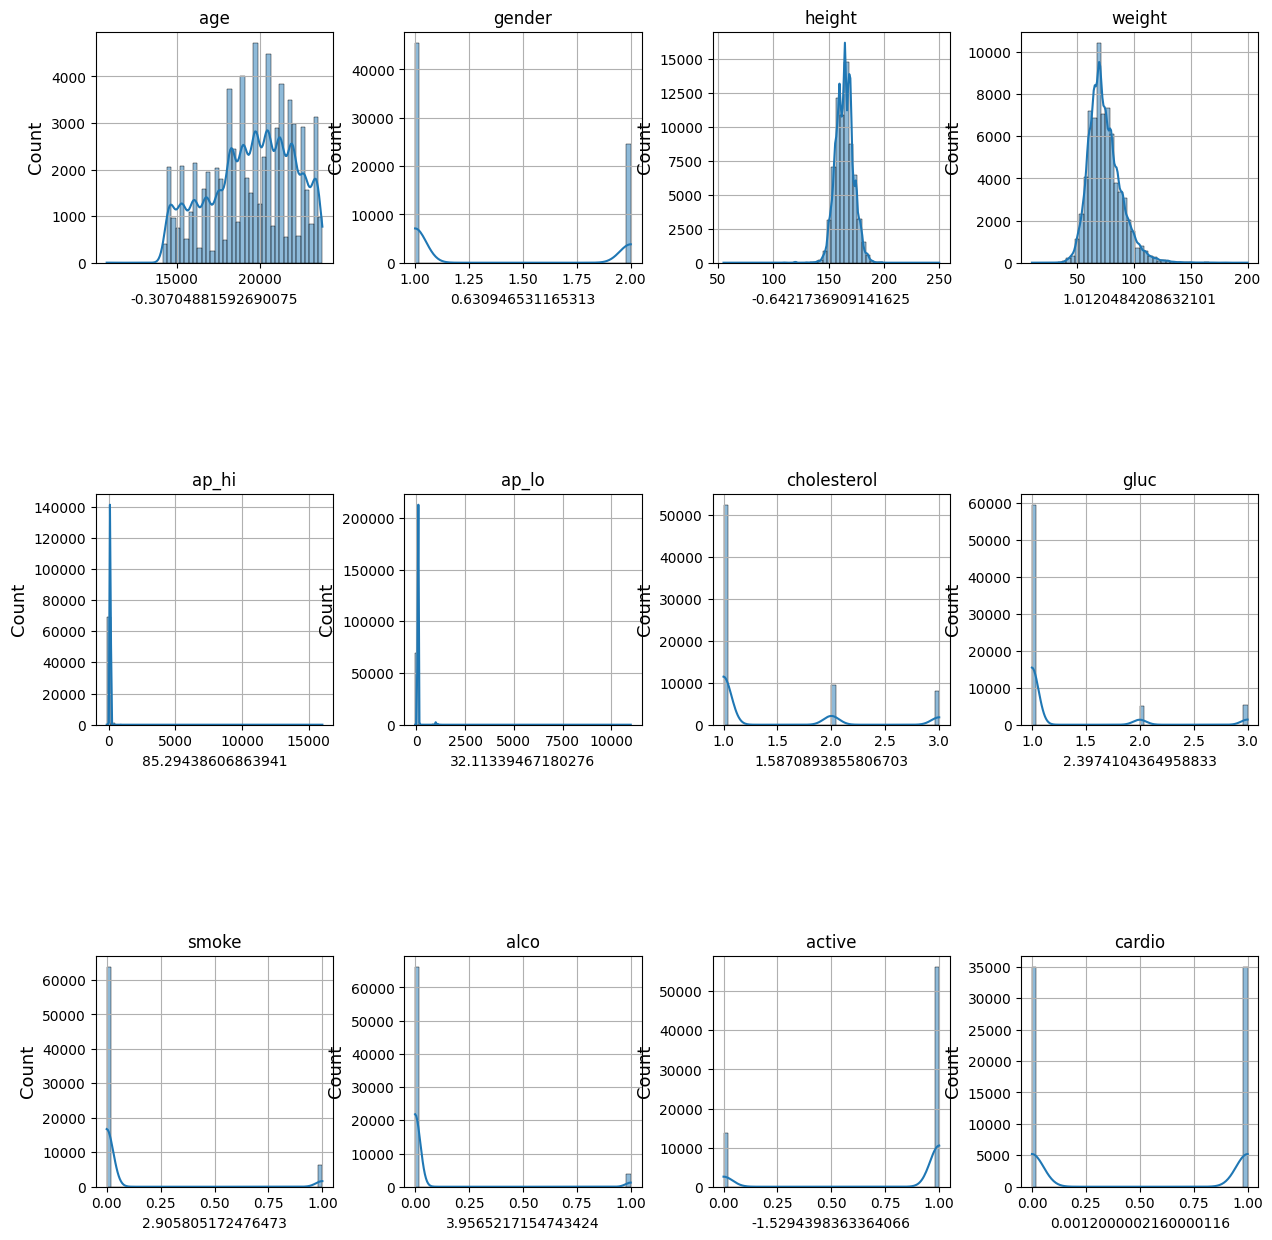

In [9]:
# Create histogram of the numerical columns to know how data distributed for each feature

cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15,15))

for i, col in enumerate(cols):
    plt.subplot(3,4,i+1)
    plt.xlabel(f'{skew(df[col])}')
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=1, wspace=0.3)
    plt.grid(True)
    plt.title(col)
    sns.histplot(data=df, x=col, bins=50, kde=True)

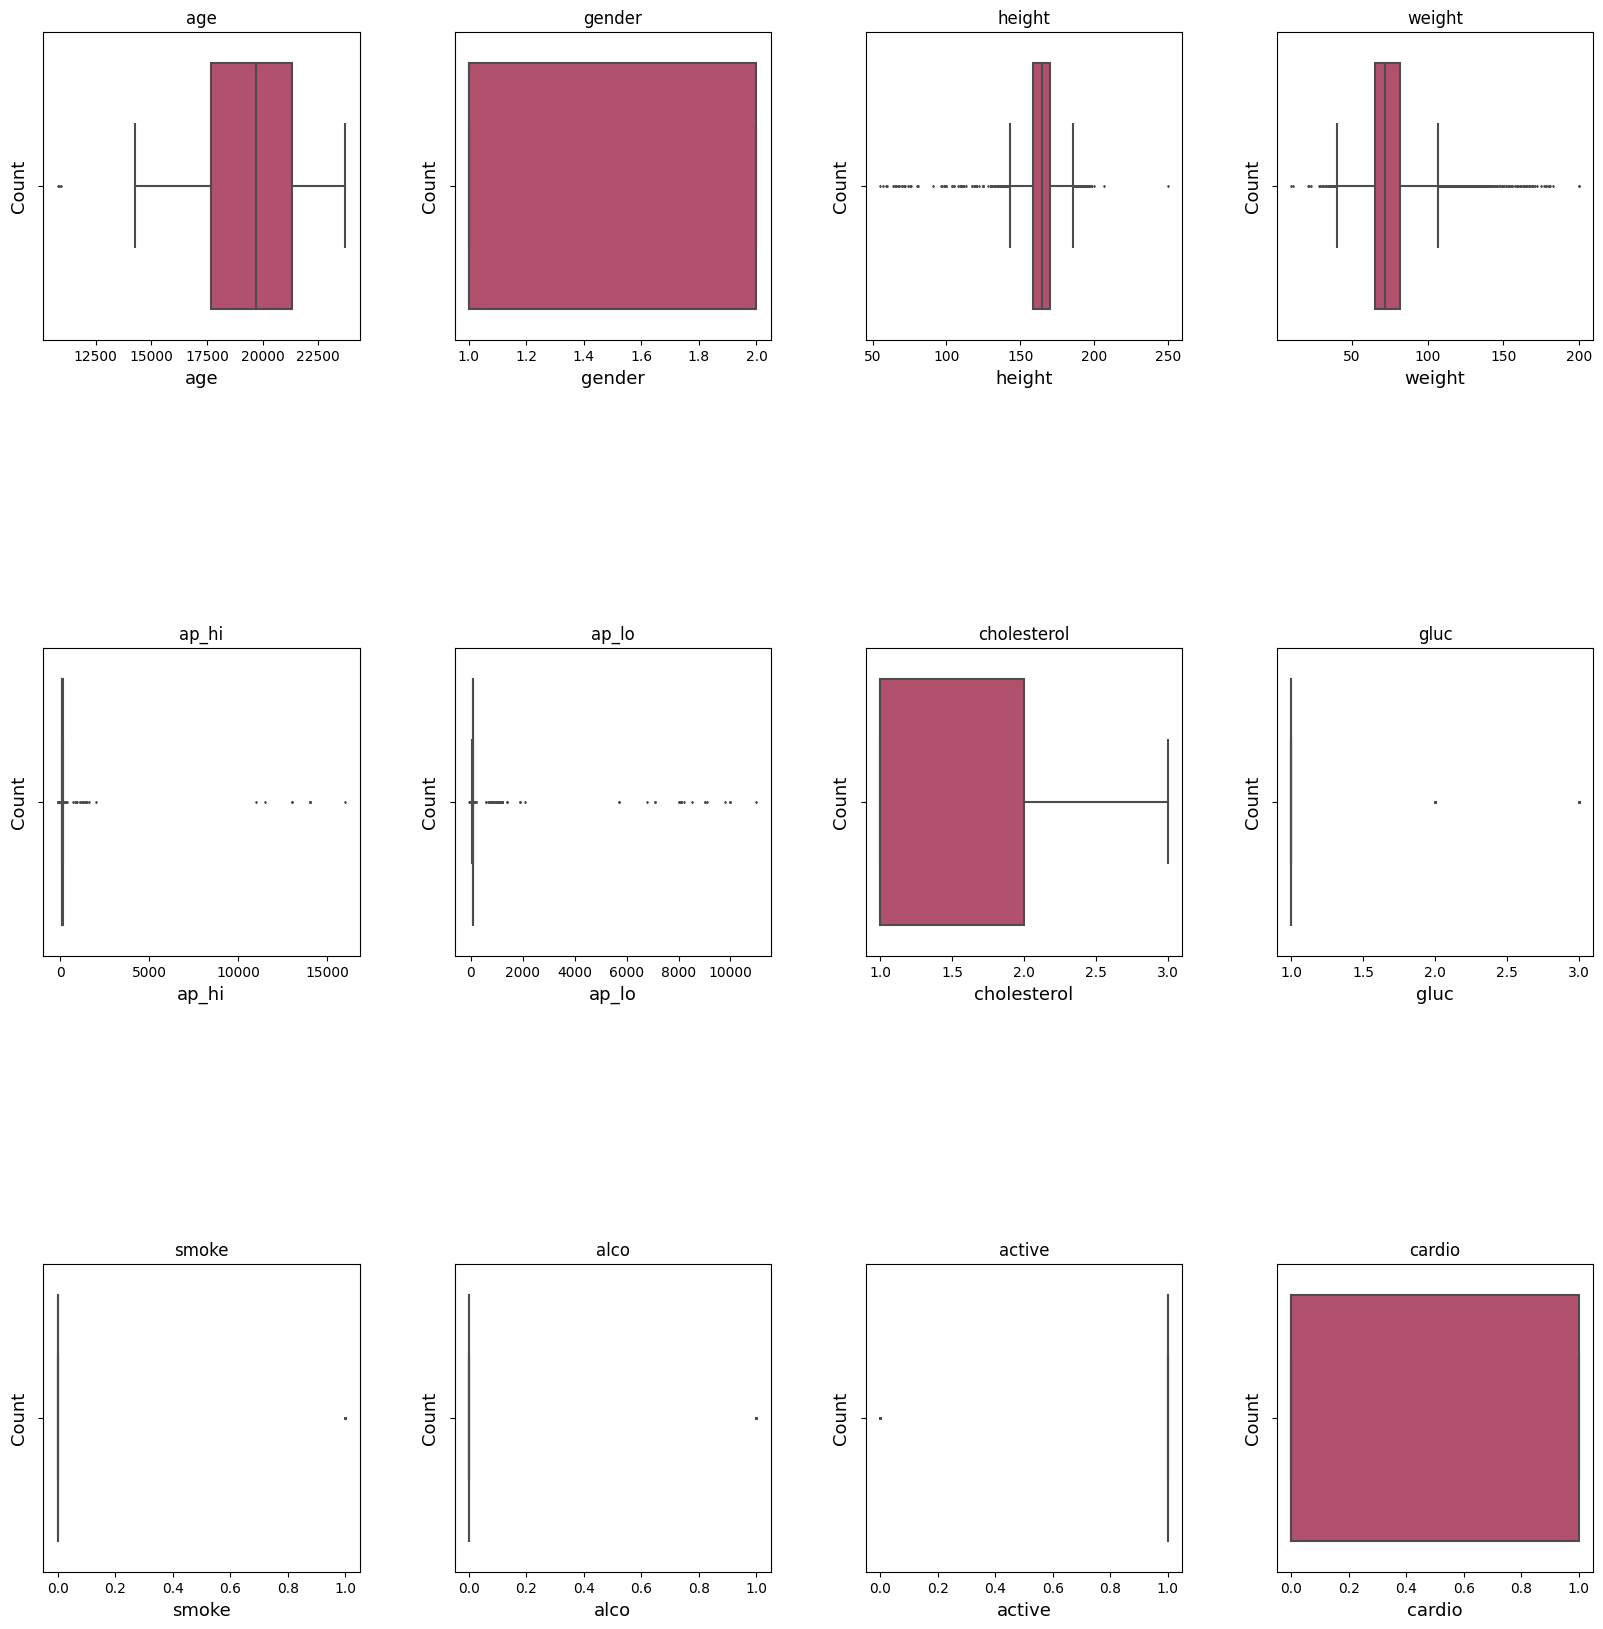

In [10]:
# Check box plot for the numerical columns to find out whether there are outliers in each feature
cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    plt.subplot(3,4,i+1)
    plt.title(col)
    plt.xlabel('Frequency', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=1, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)

Dari distribusi data di atas, kemungkinan data outlier akan dibersihkan dengan Teknik IQR. IQR (Interquartile Range) adalah salah satu teknik statistik yang digunakan untuk mengukur sebaran data dalam sebuah kumpulan data atau distribusi. IQR biasanya digunakan dalam analisis data untuk mengidentifikasi nilai-nilai yang dianggap sebagai outliers atau pencilan. Teknik IQR melibatkan langkah-langkah berikut:
1. Mengurutkan Data: Pertama, data harus diurutkan dari yang terkecil hingga yang terbesar atau sebaliknya, tergantung pada preferensi.
2. Menentukan Quartile Pertama (Q1) dan Quartile Ketiga (Q3): Quartile pertama (Q1) adalah nilai yang berada di tengah-tengah data setelah diurutkan, yang membagi data menjadi dua bagian dengan 25% dari data di bawahnya. Quartile ketiga (Q3) adalah nilai yang berada di tengah-tengah data yang sama, tetapi membagi data menjadi dua bagian dengan 75% dari data di bawahnya.
3. Menghitung IQR: IQR adalah selisih antara Q3 dan Q1, yaitu IQR = Q3 - Q1.
4. Menentukan Batas Atas dan Batas Bawah: Batas atas (Upper Bound) adalah nilai Q3 ditambah 1,5 kali IQR, sedangkan batas bawah (Lower Bound) adalah nilai Q1 dikurangi 1,5 kali IQR.
5. Mengidentifikasi Pencilan (Outliers): Nilai-nilai yang berada di luar batas atas dan batas bawah dianggap sebagai pencilan atau outliers.

$$\text{IQR} = Q3 - Q1

In [11]:
# Remove outliers using IQR Technique

col_num = ['age','height', 'weight', 'ap_hi', 'ap_lo']
def RemoveOutliers(col_num):
    for col in col_num:
        iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
        lower_threshold = df[col].quantile(0.25)-(iqr*1.5)
        upper_threshold = df[col].quantile(0.75)+(iqr*1.5)
        print(f"The range of outlier values in the feature {col} : <{round(lower_threshold,2)} or >{round(upper_threshold,2)}")
        df.loc[(df[col]<=lower_threshold),col] = lower_threshold
        df.loc[(df[col]>=upper_threshold),col] = upper_threshold
RemoveOutliers(col_num)

The range of outlier values in the feature age : <12169.5 or >26821.5
The range of outlier values in the feature height : <142.5 or >186.5
The range of outlier values in the feature weight : <39.5 or >107.5
The range of outlier values in the feature ap_hi : <90.0 or >170.0
The range of outlier values in the feature ap_lo : <65.0 or >105.0


Di bawah ini merupakan data yang kemungkinanya sudah dibersihkan dengan teknik IQR.

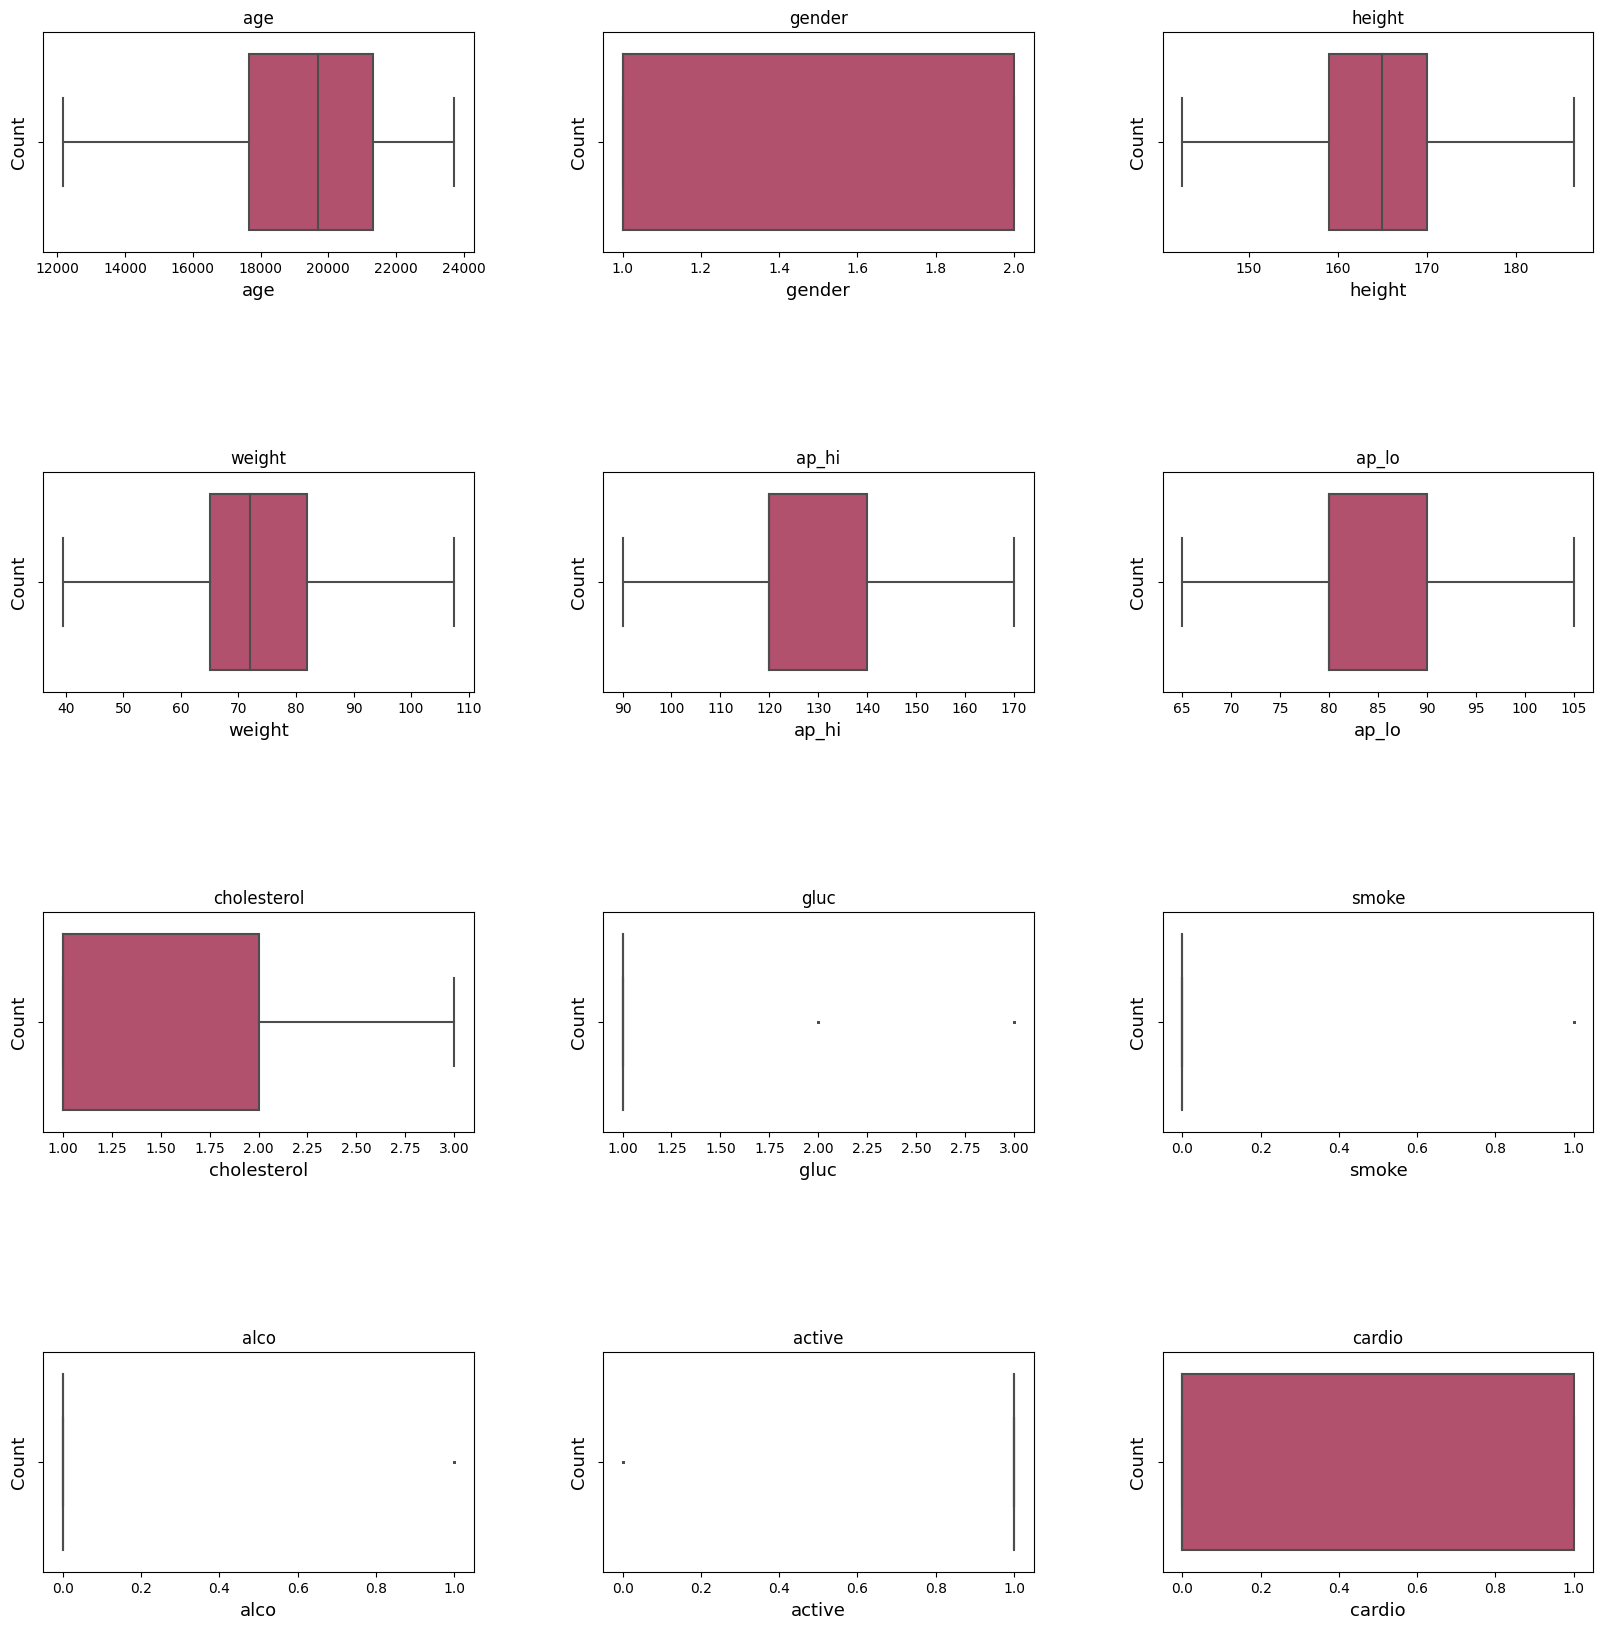

In [12]:
# Check box plot for the numerical columns to find out whether there are outliers in each feature
cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    plt.title(col)
    plt.xlabel('Frequency', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=1, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.939800,2467.013311,12169.5,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.407179,7.825729,142.5,159.0,165.0,170.0,186.5
weight,70000.0,73.925678,13.442403,39.5,65.0,72.0,82.0,107.5
ap_hi,70000.0,126.712329,16.385978,90.0,120.0,120.0,140.0,170.0
ap_lo,70000.0,81.779500,9.062702,65.0,80.0,80.0,90.0,105.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [14]:
# Checking value counts each feature
cols = df.columns

for col in cols:
    print(f"{df[col].value_counts()}\n")

age
18236.0    32
19741.0    32
20442.0    31
18253.0    31
20376.0    31
           ..
16493.0     1
20059.0     1
23659.0     1
21583.0     1
17926.0     1
Name: count, Length: 8073, dtype: int64

gender
1    45530
2    24470
Name: count, dtype: int64

height
165.0    5853
160.0    5022
170.0    4679
168.0    4399
164.0    3396
158.0    3313
162.0    3257
169.0    2791
156.0    2755
167.0    2538
163.0    2516
172.0    2016
159.0    1994
166.0    1979
157.0    1814
175.0    1809
155.0    1782
161.0    1712
174.0    1557
154.0    1443
171.0    1312
178.0    1227
152.0    1161
176.0    1145
173.0    1077
153.0    1059
150.0    1051
180.0     879
151.0     614
177.0     456
179.0     418
149.0     341
182.0     328
148.0     300
186.5     269
142.5     250
185.0     227
147.0     225
181.0     191
183.0     159
184.0     156
145.0     153
146.0     151
186.0     109
144.0      71
143.0      46
Name: count, dtype: int64

weight
65.0    3850
70.0    3764
68.0    2831
75.0    2740
60.0    

#### Feature Age

In [15]:
# Umur yang dihitung berdasarkan hari akan di ubah menjadi tahun.
df['age'] = df['age'].apply(lambda x: x // 365)
df['age'] = df['age'].astype(int)

Akan dilakukan penghitungan value pada feature umur agar diketahui rentang umur yang terdapat di dalam dataset.

<Axes: title={'center': 'Age value counts'}, xlabel='age', ylabel='Count'>

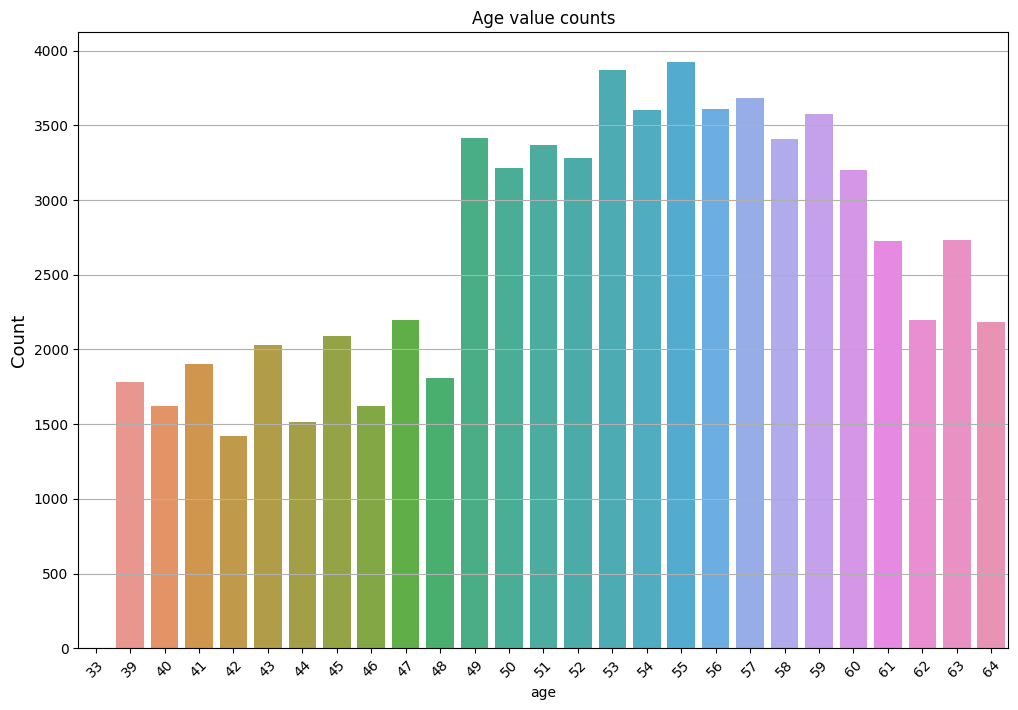

In [16]:
plt.figure(figsize=(12,8))
plt.xlabel('Frequency')
plt.ylabel("Count", fontsize=13)
plt.subplots_adjust(hspace=1, wspace=0.3)
plt.xticks(rotation=45)
plt.title("Age value counts")
plt.grid(True)
sns.barplot(x=df['age'].value_counts().index, y=df['age'].value_counts().values)

Umur yang terdapat pada dataset tersebut ada di antara umur 33 sampai 64. Selanjutnya akan dilihat umur berapa orang biasanya terkena penyakit kardiovaskular.

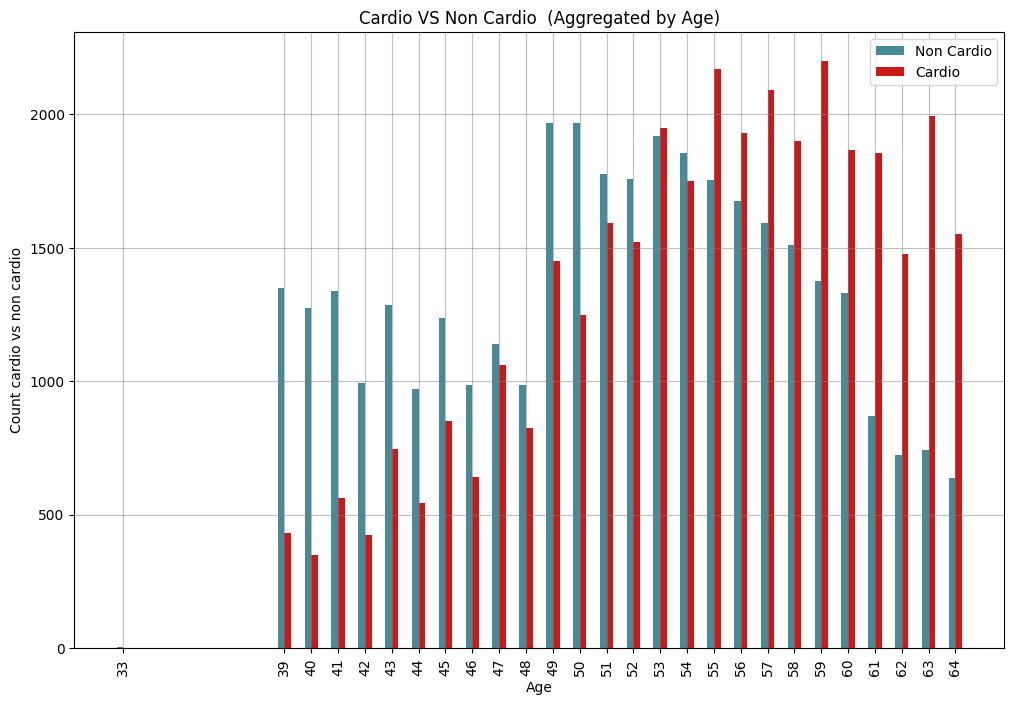

In [17]:
dfage_agg = df.groupby('age')['cardio'].value_counts().unstack(fill_value=0)
list_noncardio = dfage_agg[0].tolist()
list_cardio = dfage_agg[1].tolist()

x = dfage_agg.index

# Set width to give a space for bar chart
width = 0.25
plt.figure(figsize=(12,8))

bar_noncar = plt.bar(x, list_noncardio, width, color='#468B97')
bar_car = plt.bar(x + width, list_cardio, width, color='#CD1818')

# Set the title, label, and legend
plt.xlabel('Age')
plt.ylabel("Count cardio vs non cardio")
plt.title("Cardio VS Non Cardio  (Aggregated by Age)")
plt.legend( (bar_noncar, bar_car ), ('Non Cardio', 'Cardio'))

# Adjustment plot
plt.grid(True, color = "grey", alpha=0.5, linestyle = "-")
plt.xticks(x+width/2,dfage_agg.index, rotation=90)
plt.show()


Data di atas menunjukan bahwa pada umur 39 ke atas orang mulai terkena penyakit kardiovaskular dan akan meningkat seiring bertambahnya usia.

### Feature Gender

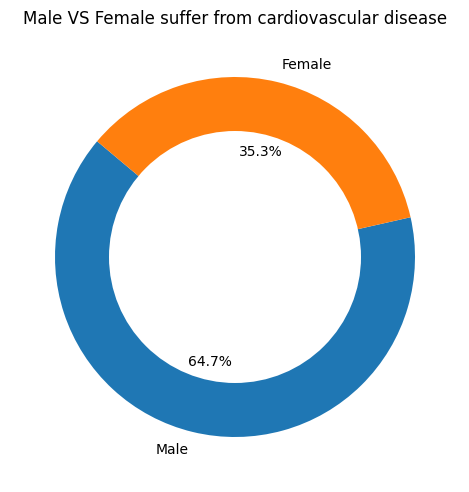

In [18]:
labels = ["Male", "Female"]
value = df['gender'][df['cardio']==1].value_counts().tolist()
tot = sum(value)
percentages = [(value / tot) * 100 for value in value]

# Create a pie chart with value percentages inside
plt.pie(value, labels=labels, autopct='%.1f%%', startangle=140)

# Draw center circle to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title("Male VS Female suffer from cardiovascular disease")
plt.show()

Dilihat dari perbandingan antara laki-laki dan perempuan yang terkena kardiovaskular, laki-laki lebih banyak yang mengalami penyakit kardiovaskular dari pada perempuan dengan perbandingan 64.7:35.5.

### Feature Cholesterol & Gluc

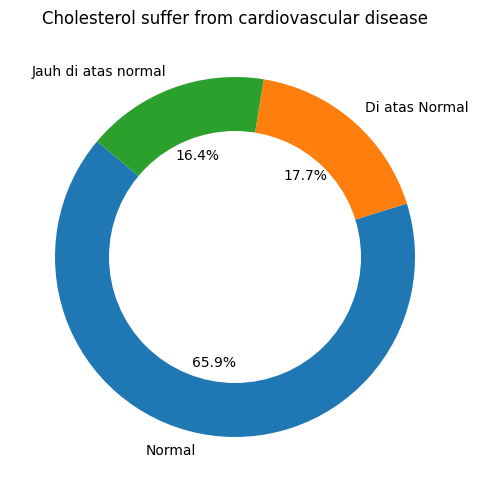

In [19]:
labels = ["Normal", "Di atas Normal", "Jauh di atas normal"]
value = df['cholesterol'][df['cardio']==1].value_counts().tolist()
tot = sum(value)
percentages = [(value / tot) * 100 for value in value]

# Create a pie chart with value percentages inside
plt.pie(value, labels=labels, autopct='%.1f%%', startangle=140)

# Draw center circle to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title("Cholesterol suffer from cardiovascular disease")
plt.show()

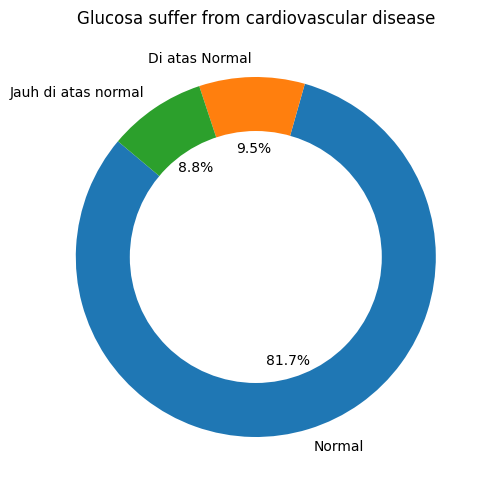

In [20]:
labels = ["Normal", "Di atas Normal", "Jauh di atas normal"]
value = df['gluc'][df['cardio']==1].value_counts().tolist()
tot = sum(value)
percentages = [(value / tot) * 100 for value in value]

# Create a pie chart with value percentages inside
plt.pie(value, labels=labels, autopct='%.1f%%', startangle=140)

# Draw center circle to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title("Glucosa suffer from cardiovascular disease")
plt.show()

Dilihat dari hasil pengukuran kadar gula darah dan kolesterol untuk pasien penderita kardiovaskular, semua hasil gula darah dan kolesterol berpeluang mengalami penyakit kardiovaskular.

## Feature Smoking, Alcohol, & Active

In [21]:
dfsmoke_agg = df.groupby('smoke')['cardio'].value_counts().unstack(fill_value=0)
dfalco_agg = df.groupby('alco')['cardio'].value_counts().unstack(fill_value=0)
dfactive_agg = df.groupby('active')['cardio'].value_counts().unstack(fill_value=0)

Pada feature kebiasaan smoking, alcohol, dan active akan dilihat apakah terdapat pengaruh terhadap penyakit kardiovaskular.

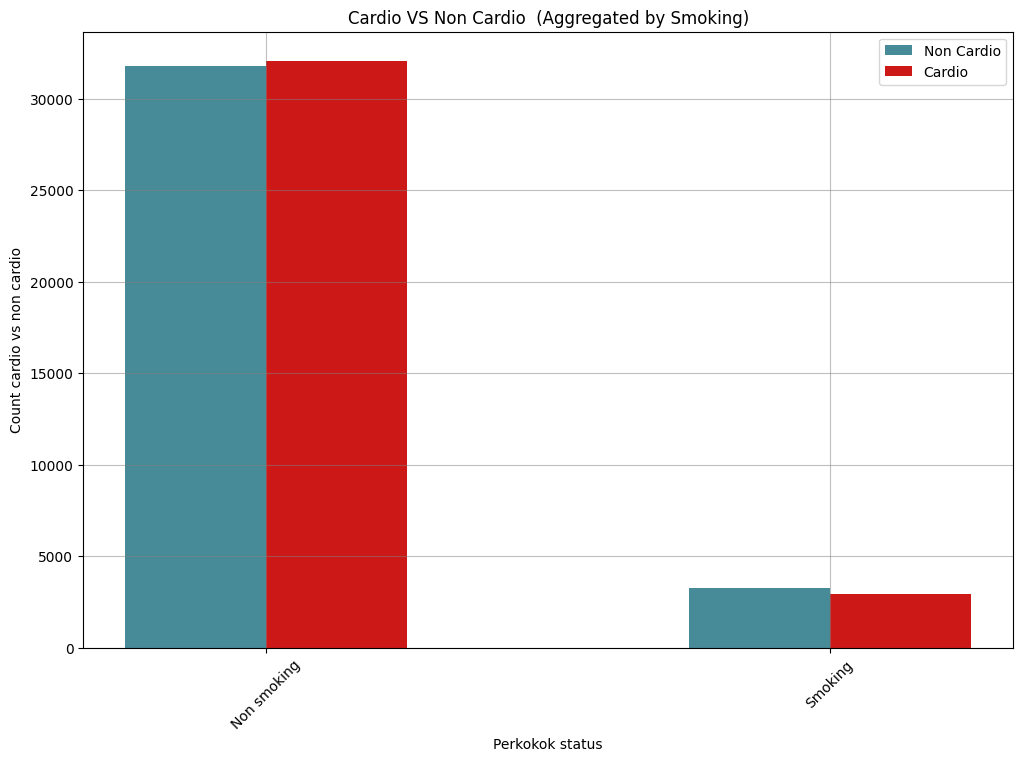

In [22]:
list_noncardio = dfsmoke_agg[0].tolist()
list_cardio = dfsmoke_agg[1].tolist()

x = dfsmoke_agg.index

# Set width to give a space for bar chart
width = 0.25
plt.figure(figsize=(12,8))

bar_noncar = plt.bar(x, list_noncardio, width, color='#468B97')
bar_car = plt.bar(x + width, list_cardio, width, color='#CD1818')

# Set the title, label, and legend
plt.xlabel('Perkokok status')
plt.ylabel("Count cardio vs non cardio")
plt.title("Cardio VS Non Cardio  (Aggregated by Smoking)")
plt.legend( (bar_noncar, bar_car ), ('Non Cardio', 'Cardio'))

# Adjustment plot
plt.grid(True, color = "grey", alpha=0.5, linestyle = "-")
plt.xticks(x+width/2,["Non smoking", "Smoking"], rotation=45)
plt.show()


Dapat dilihat pada plot bar di atas, orang yang tidak merokok dan yang merokok sama-sama memiliki resiko penyakit kardiovaskular.

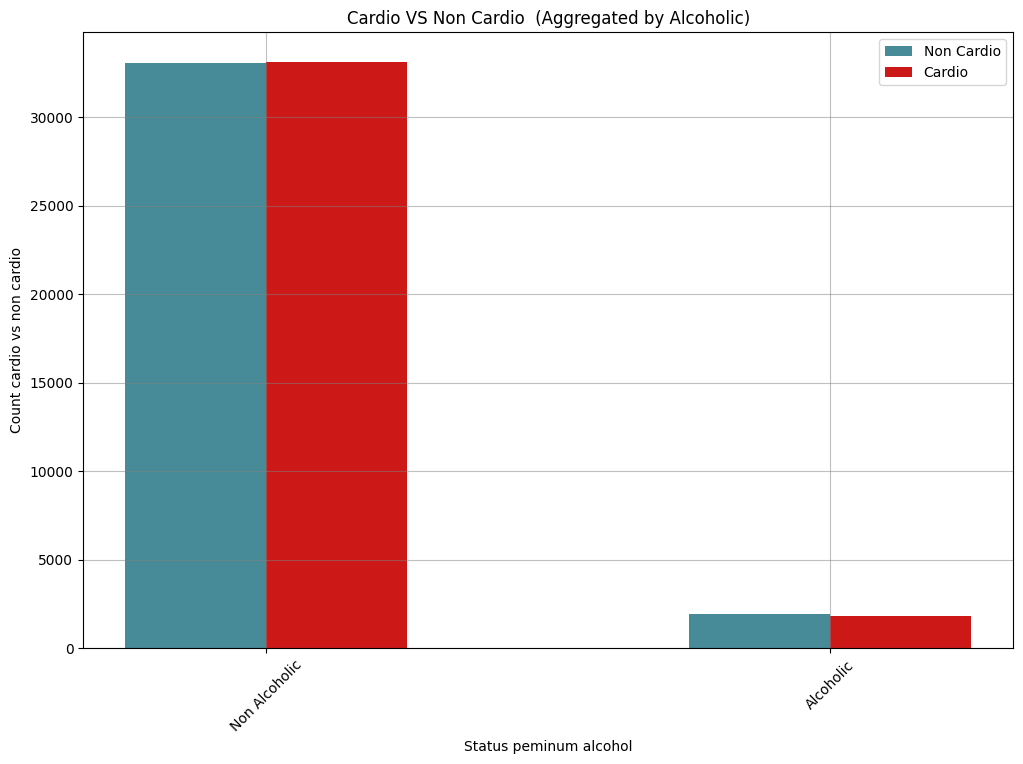

In [23]:
list_noncardio = dfalco_agg[0].tolist()
list_cardio = dfalco_agg[1].tolist()

x = dfalco_agg.index

# Set width to give a space for bar chart
width = 0.25
plt.figure(figsize=(12,8))

bar_noncar = plt.bar(x, list_noncardio, width, color='#468B97')
bar_car = plt.bar(x + width, list_cardio, width, color='#CD1818')

# Set the title, label, and legend
plt.xlabel('Status peminum alcohol')
plt.ylabel("Count cardio vs non cardio")
plt.title("Cardio VS Non Cardio  (Aggregated by Alcoholic)")
plt.legend( (bar_noncar, bar_car ), ('Non Cardio', 'Cardio'))

# Adjustment plot
plt.grid(True, color = "grey", alpha=0.5, linestyle = "-")
plt.xticks(x+width/2,["Non Alcoholic", "Alcoholic"], rotation=45)
plt.show()

Begitu pula pada peminum alcohol, peminum maupun tidak peminum sama-sama memiliki resiko terhadap penyakit kardiovaskular.

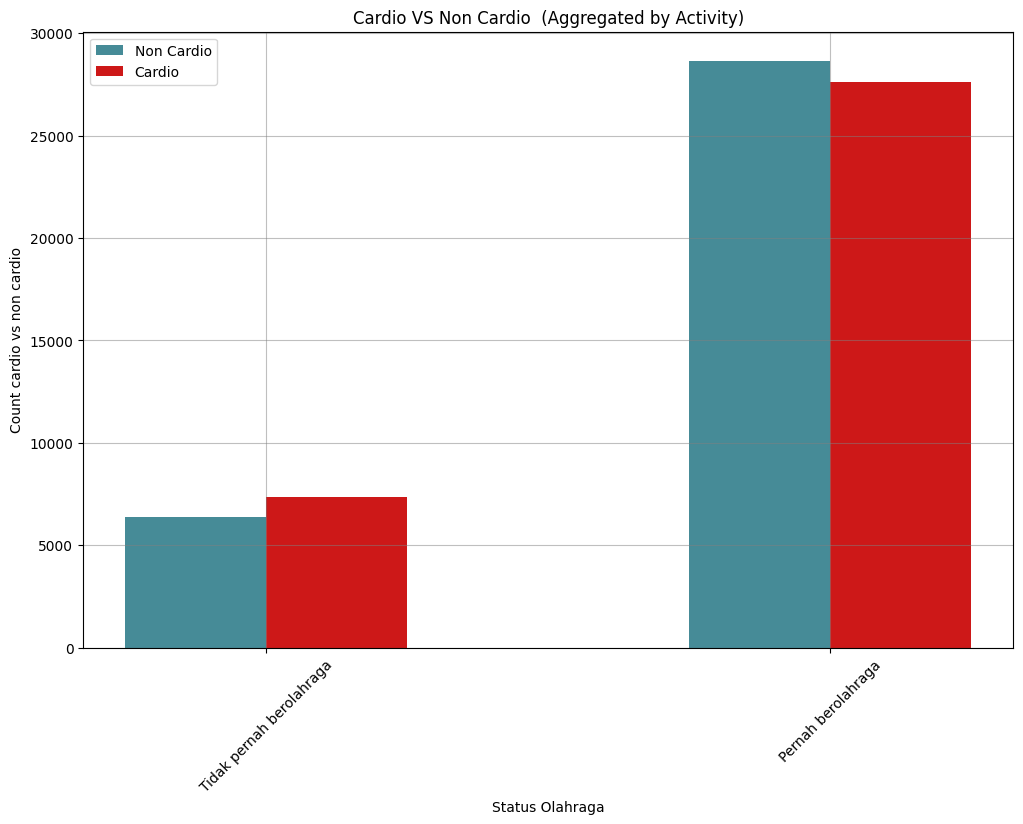

In [24]:
list_noncardio = dfactive_agg[0].tolist()
list_cardio = dfactive_agg[1].tolist()

x = dfactive_agg.index

# Set width to give a space for bar chart
width = 0.25
plt.figure(figsize=(12,8))

bar_noncar = plt.bar(x, list_noncardio, width, color='#468B97')
bar_car = plt.bar(x + width, list_cardio, width, color='#CD1818')

# Set the title, label, and legend
plt.xlabel('Status Olahraga')
plt.ylabel("Count cardio vs non cardio")
plt.title("Cardio VS Non Cardio  (Aggregated by Activity)")
plt.legend( (bar_noncar, bar_car ), ('Non Cardio', 'Cardio'))

# Adjustment plot
plt.grid(True, color = "grey", alpha=0.5, linestyle = "-")
plt.xticks(x+width/2,["Tidak pernah berolahraga", "Pernah berolahraga"], rotation=45)
plt.show()

Sedangkan pada feature active yang diukur apakah orang sering berolahraga atau tidak, nyatanya orang yang tidak pernah berolahraga memiliki faktor resiko terkena penyakit kardiovaskular yang lebih tinggi dari pada orang yang senang berolahraga.

### BMI & Obessitas

BMI atau Body Mass Index (Indeks Massa Tubuh) adalah sebuah angka yang digunakan untuk mengukur hubungan antara berat badan seseorang dengan tinggi badannya. BMI dapat memberikan gambaran apakah berat badan seseorang proporsional dengan tinggi badannya atau apakah terdapat risiko kelebihan berat badan atau kurang berat badan.

Rumus menghitung BMI adalah:

$$\text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2}

Nilai-nilai BMI biasanya dikelompokkan ke dalam kategori-kategori sebagai berikut:
* BMI < 18.5: Kekurangan berat badan
* 18.5 ≤ BMI < 24.9: Berat badan normal
* 25 ≤ BMI < 29.9: Kelebihan berat badan
* BMI ≥ 30: Obesitas

Untuk itu akan dibuatkan feature baru yaitu BMI dari penghitungan rumus di atas.

In [25]:
def hitung_bmi(tinggi, berat):
    tinggi_m = tinggi/100 # konversi ke m
    bmi = berat/ (tinggi_m**2)
    return bmi

# Applying the function
df['BMI'] = df.apply(lambda x: hitung_bmi(x['height'], x['weight']), axis=1)

In [26]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168.0,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156.0,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165.0,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169.0,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156.0,56.0,100,65,1,1,0,0,0,0,23.011177


Setelah mendapatkan hasil BMI akan di kategorikan BMI tersebut ke dalam feature baru bernama obes dengan empat golongan yaitu normal, kekurangan berat badan, kelebihan berat badan, dan obesitas.

In [27]:
df['obes'] = df['BMI'].apply(lambda x: 3 if x >= 30 else (2 if 25 < x <= 29.9 else (1 if 18.5 <= x < 24.9 else 0)))
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,obes
0,50,2,168.0,62.0,110,80,1,1,0,0,1,0,21.967120,1
1,55,1,156.0,85.0,140,90,3,1,0,0,1,1,34.927679,3
2,51,1,165.0,64.0,130,70,3,1,0,0,0,1,23.507805,1
3,48,2,169.0,82.0,150,100,1,1,0,0,1,1,28.710479,2
4,47,1,156.0,56.0,100,65,1,1,0,0,0,0,23.011177,1


Selanjutkan akan dilihat dari empat golongan tersebut yang paling banyak terkena penyakit kardiovaskular.

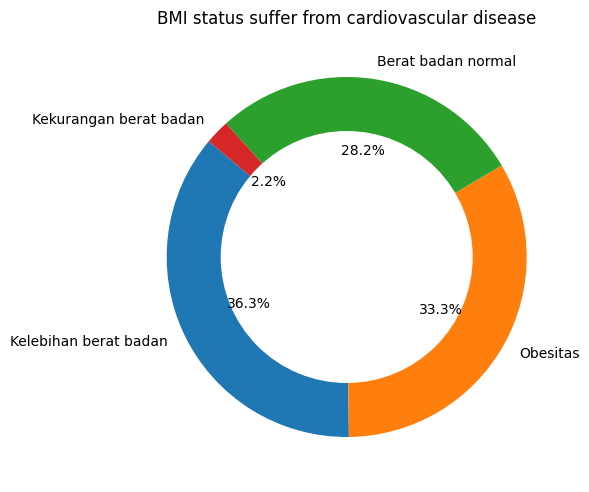

In [28]:
labels = ["Kelebihan berat badan", "Obesitas", "Berat badan normal", "Kekurangan berat badan"]
value = df['obes'][df['cardio']==1].value_counts().tolist()
tot = sum(value)
percentages = [(value / tot) * 100 for value in value]

# Create a pie chart with value percentages inside
plt.pie(value, labels=labels, autopct='%.1f%%', startangle=140)

# Draw center circle to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title("BMI status suffer from cardiovascular disease")
plt.show()

Ternyata dari hasil perhitungan yang terkena penyakit kardiovaskular dari empat golongan tersebut, orang yang kelebihan berat badan dan obesitas jauh lebih beresiko terkena penyakit kardiovaskular.

## Blood pressure

Tekanan darah adalah ukuran tekanan yang dihasilkan oleh aliran darah melalui pembuluh darah dalam tubuh manusia. Tekanan darah terutama diukur dalam dua nilai, yaitu tekanan sistolik dan tekanan diastolik, dan dinyatakan dalam milimeter air raksa (mmHg). Biasanya, tekanan darah direkam dalam bentuk dua angka, seperti "120/80 mmHg".
1. Tekanan Sistolik: Ini adalah angka pertama dalam pengukuran tekanan darah dan mencerminkan tekanan pada saat jantung berkontraksi atau memompa darah ke dalam arteri. Angka ini mengukur tekanan tertinggi dalam siklus denyut jantung.
2. Tekanan Diastolik: Ini adalah angka kedua dalam pengukuran tekanan darah dan mencerminkan tekanan pada saat jantung beristirahat di antara kontraksi. Angka ini mengukur tekanan terendah dalam siklus denyut jantung.

Tekanan darah penting untuk kesehatan manusia karena dapat memberikan informasi tentang kesehatan sistem kardiovaskular. Tekanan darah yang tinggi (hipertensi) dapat meningkatkan risiko penyakit jantung, stroke, dan masalah kesehatan lainnya, sementara tekanan darah yang terlalu rendah (hipotensi) juga dapat menyebabkan masalah kesehatan.

Tekanan darah normal, hipotensi, dan hipertensi adalah berbagai kisaran tekanan darah yang digunakan untuk mengukur kesehatan kardiovaskular seseorang. Berikut adalah penjelasan singkat tentang ketiganya:
1. Tekanan Darah Normal:
    1. Sistolik: Biasanya kurang dari 120 mmHg.
    2. Diastolik: Biasanya kurang dari 80 mmHg.
2. Hipotensi (Tekanan Darah Rendah):
    1. Sistolik: Kurang dari 90 mmHg.
    2. Diastolik: Kurang dari 60 mmHg.
3. Hipertensi (Tekanan Darah Tinggi):
    1. Sistolik: 121 mmHg atau lebih tinggi.
    2. Diastolik: 81 mmHg atau lebih tinggi.

In [29]:
df["bld_pres"] = df.apply(lambda row: 1 if 60 <= row["ap_lo"] <= 80 and 90 <= row["ap_hi"] <= 120
                                  else (2 if row["ap_lo"] > 80 and row["ap_hi"] > 120
                                        else (0 if row["ap_lo"] < 60 and row["ap_hi"] < 90
                                              else None)), axis=1)

In [30]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,obes,bld_pres
0,50,2,168.0,62.0,110,80,1,1,0,0,1,0,21.967120,1,1.0
1,55,1,156.0,85.0,140,90,3,1,0,0,1,1,34.927679,3,2.0
2,51,1,165.0,64.0,130,70,3,1,0,0,0,1,23.507805,1,NaN
3,48,2,169.0,82.0,150,100,1,1,0,0,1,1,28.710479,2,2.0
4,47,1,156.0,56.0,100,65,1,1,0,0,0,0,23.011177,1,1.0


Terdapat missing value karena terdapat tekanan darah sistolik atau diastolik yang salah satunya tinggi dan satunya lagi normal.

In [31]:
df['bld_pres'].unique()

array([ 1.,  2., nan])

In [32]:
df[df['bld_pres'].isna()]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,obes,bld_pres
2,51,1,165.0,64.0,130,70,3,1,0,0,0,1,23.507805,1,NaN
6,60,1,157.0,93.0,130,80,3,1,0,0,1,0,37.729725,3,NaN
16,58,1,170.0,75.0,130,70,1,1,0,0,0,0,25.951557,2,NaN
21,58,1,157.0,69.0,130,80,1,1,0,0,1,0,27.993022,2,NaN
29,57,2,169.0,74.0,130,70,1,3,0,0,0,0,25.909457,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69971,55,2,177.0,80.0,130,80,1,1,0,0,1,0,25.535446,2,NaN
69973,60,2,175.0,72.0,130,80,1,1,0,0,1,0,23.510204,1,NaN
69985,49,1,156.0,102.0,130,80,1,1,0,1,0,1,41.913215,3,NaN
69994,57,1,165.0,80.0,150,80,1,1,0,0,1,1,29.384757,2,NaN


Akan dilakukan fillna dengan nilai 3. Nilai 3 ini berarti orang tersebut mengalami hipertensi sistolik atau hipertensi diastolik. Itu berarti salah satu tekanan darah sistolik atau diastoliknya saja yang tinggi.

In [33]:
# Mengisi nilai NaN dengan nilai tertentu, misalnya 3
df['bld_pres'].fillna(3, inplace=True)

In [34]:
df['bld_pres'].value_counts()

bld_pres
1.0    39057
2.0    19357
3.0    11586
Name: count, dtype: int64

Akan dibuat plot berupa perbandingan penderita kardiovaskular yang memiliki tekanan darah normal, hipertensi, dan hipertensi sistolik atau diastolik.

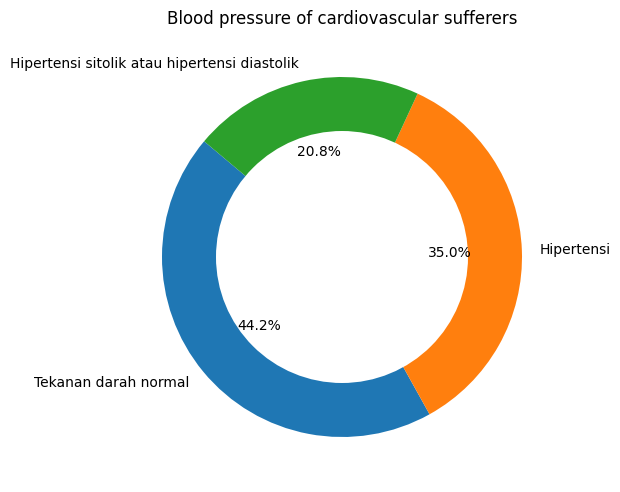

In [35]:
labels = ["Tekanan darah normal", "Hipertensi", "Hipertensi sitolik atau hipertensi diastolik"]
value = df['bld_pres'][df['cardio']==1].value_counts().tolist()
tot = sum(value)
percentages = [(value / tot) * 100 for value in value]

# Create a pie chart with value percentages inside
plt.pie(value, labels=labels, autopct='%.1f%%', startangle=140)

# Draw center circle to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title("Blood pressure of cardiovascular sufferers")
plt.show()

Dapat disimpulkan bahwa orang yang bertekanan darah tinggi lebih banyak yang menderita penyakit kardiovaskular dari pada orang yang bertekanan darah rendah dengan perbandingan 44.2% (tekanan darah normal) dan 55.8% (tekanan darah tinggi).

## Korelasi antara setiap feature

In [36]:
df['cardio'] = df.pop('cardio')

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

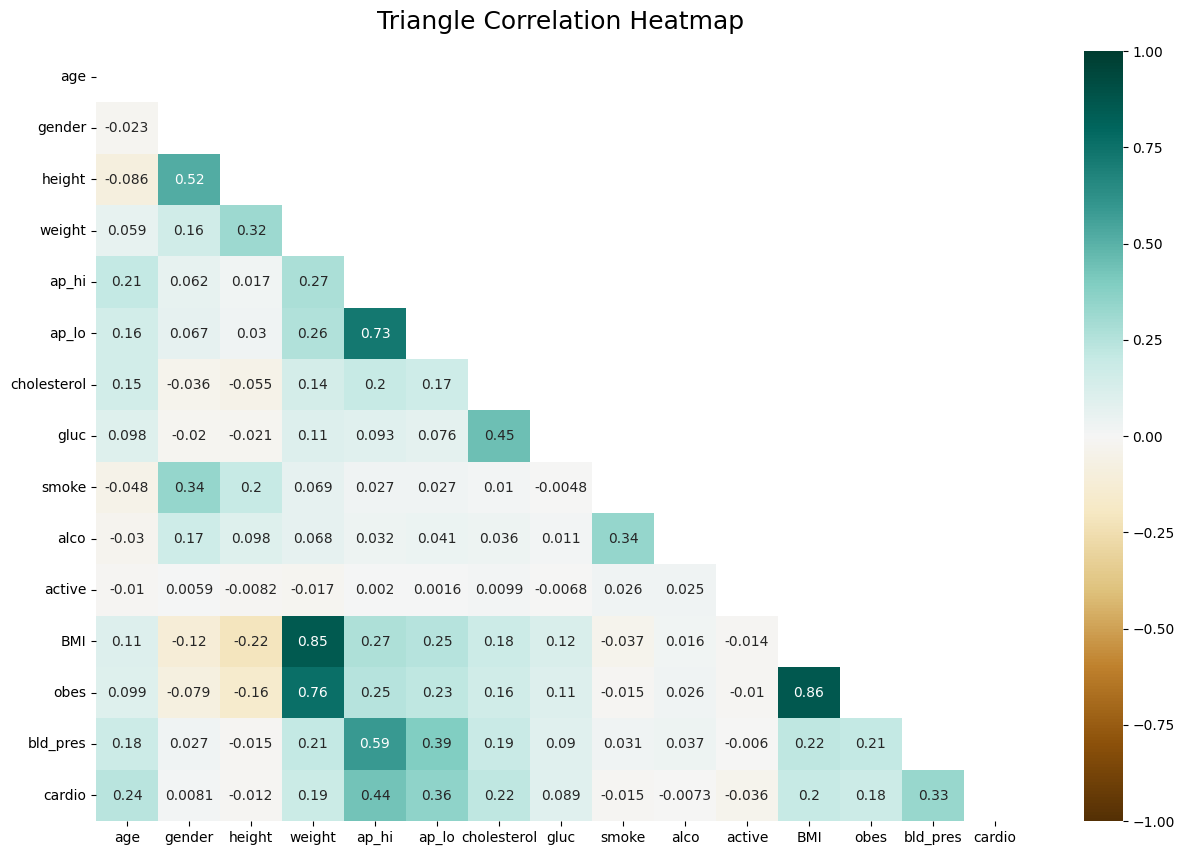

In [37]:
# Look data corelation of the data

# Set figure plt
plt.figure(figsize=(15,10), dpi=100)

# Create mask
mask = np.triu(np.ones_like(df.corr()))

# Plotting
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Set the title
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Dapat dilihat pada plot segitiga korelasi di atas feature cardio memiliki korelasi positif pada feture usia, gender, weight, ap_hi, ap_lo, cholesterol, glucose, BMI, obes, dan bld_press. Hubungan dari feature tersebut dapat dikatakan cukup rendah hingga sedang. Sedangkan pada feature height, smoke, alco, dan active memiliki korelasi negatif sehingga dapat dikatakan variabel tersebut tidak berkorelasi dengan cardio.

<h1 align='center'>Data Preparation</h1>

***

In [38]:
# Seperate X and y label
X = df.drop('cardio', axis=1)
y = df['cardio']

## Split dan Scaling Data
Data akan di bagi dengan proporsi 80 data training dan 20 data testing. Data yang telah dilakukan pembagian selanjutnya akan melalui proses scaling.

Scaling data adalah proses mengubah rentang (skala) dari data numerik dalam suatu dataset sehingga memiliki skala yang seragam atau sebanding. Tujuan utama dari scaling data adalah untuk memastikan bahwa variabel-variabel dalam dataset memiliki pengaruh yang seimbang pada model atau analisis yang sedang dilakukan. Ini sangat penting dalam banyak algoritma pembelajaran mesin dan analisis data karena banyak algoritma sensitif terhadap perbedaan skala antara variabel-variabelnya.

Teknik yang dilakukan pada scaling adalah Min-Max Scaling (Normalization):
- Min-Max scaling mengubah data sehingga nilainya berada dalam rentang tertentu, seringkali [0, 1].
- Metode ini baik digunakan ketika ingin menjaga informasi relatif antara variabel tetapi menginginkan skala yang seragam.
- Rumus Min Max Scaling:
    $$X_{\text{new}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}

In [39]:
# Split and scalling data
X_train, X_test, y_train, y_test = train_test_split(X , y, shuffle = True, test_size = 0.2, random_state = 42)

# Scaling data
scaler = MinMaxScaler()
scaler.fit(X_train)

# The transofrmation of X
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# See the end of dimensions data
print('Dimensi feature data train =', X_train_scaled.shape)
print('Dimensi target data train =', y_train.shape)
print('Dimensi feature data test =', X_test_scaled.shape)
print('Dimensi target data test =', y_test.shape)

Dimensi feature data train = (56000, 14)
Dimensi target data train = (56000,)
Dimensi feature data test = (14000, 14)
Dimensi target data test = (14000,)


<h1 align='center'>Modeling</h1>

***

Alogritma yang akan dipilih sebagai pendeteksi resiko kardiovaskular adalah:
1. Logistic Regression: Ini adalah salah satu algoritma klasifikasi yang paling sederhana dan populer. Ini dapat digunakan untuk memprediksi probabilitas seseorang mengalami risiko kardiovaskular berdasarkan sejumlah fitur seperti usia, tekanan darah, kolesterol, dan lainnya.
2. K-Nearest Neighbors (KNN): KNN adalah algoritma yang sederhana namun efektif untuk klasifikasi. Ini bekerja dengan mencari k-tetangga terdekat dari setiap data poin dan memilih label mayoritas dari tetangga-tetangga tersebut.
3. Random Forest: Ini adalah algoritma ensemble yang kuat yang dapat digunakan untuk klasifikasi. Random Forest dapat mengatasi masalah overfitting dan memiliki kemampuan untuk menangani banyak fitur dengan baik. Ini dapat digunakan untuk memodelkan hubungan kompleks antara berbagai faktor risiko.
4. Gradient Boosting: Algoritma seperti XGBoost, LightGBM, atau CatBoost adalah pilihan yang baik jika ingin meningkatkan performa model. Mereka bekerja dengan menggabungkan beberapa pohon keputusan untuk meningkatkan akurasi prediksi.

Ke empat algoritma tersebut akan dicoba dan akan dipilih satu algoritma yang memberikan akurasi paling baik dan waktu runtime yang tidak terlalu lama.

In [40]:
# Train Data using several ML algorithm

# Logistic Regression
lrmodel = LogisticRegression()
lrstart_time = time.time()
lrmodel.fit(X_train_scaled, y_train)
lrend_time = time.time()
lrruntime = lrend_time - lrstart_time
y_predLr = lrmodel.predict(X_test_scaled)

# KNN
knnmodel = KNeighborsClassifier()
knnstart_time = time.time()
knnmodel.fit(X_train_scaled, y_train)
knnend_time = time.time()
knnruntime = knnend_time - knnstart_time
y_predKnn = knnmodel.predict(X_test_scaled)

# Random Forest
rfmodel = RandomForestClassifier(random_state=42)
rfstart_time = time.time()
rfmodel.fit(X_train_scaled, y_train)
rfend_time = time.time()
rfruntime = rfend_time - rfstart_time
y_predRf = rfmodel.predict(X_test_scaled)

# XGBoost
xgbmodel = xgb.XGBClassifier(random_state=42)
xgbstart_time = time.time()
xgbmodel.fit(X_train_scaled, y_train)
xgbend_time = time.time()
xgbruntime = xgbend_time - xgbstart_time
y_predXgb = xgbmodel.predict(X_test_scaled)

In [41]:
algorithm = ['Logistic Regression','K-Nearest Neighbors','Random Forest','XGBoost']
y_pred = [y_predLr, y_predKnn, y_predRf, y_predXgb]
acc = []
for ypred in y_pred:
    acc.append(accuracy_score(y_test, ypred))
    
runtime = [lrruntime, knnruntime, rfruntime, xgbruntime]

datatraining = {"Algorithm": algorithm, "Accuracy": acc, "Runtime": runtime}
datatraining = pd.DataFrame(datatraining)
datatraining

,Algorithm,Accuracy,Runtime
0,Logistic Regression,0.729071,0.126529
1,K-Nearest Neighbors,0.691571,0.127531
2,Random Forest,0.705786,8.856894
3,XGBoost,0.733000,0.793133


Setelah dilakukan pengetesan dari ke empat algoritma tersebut, XGBoost memberikan akurasi dan waktu runtime paling baik dari pada ketiga algoritma lainnya dengan akurasi 73,3% dan waktu runtime 0.86s. 

Model xgboost akan dilakukan tunning hyperparameter dengan menggunakan GridSearchCV untuk mengetahui parameter mana yang dapat meningkatkan hasil akurasi model.

In [42]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=xgbmodel, param_grid=param_grid, cv=3)

# Perform the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_estimator.predict(X_test_scaled)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Accuracy: 0.7391428571428571


Didapatkan best parameter untuk model xgboost dengan Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150} dan mendapatkan akurasi 74% dari yang awalnya hanya 73%.

In [43]:
# Training with implementating the parameters
xgbmodel = grid_search.best_estimator_
eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]
xgbmodel.fit(X_train_scaled, y_train, eval_metric=['logloss'], early_stopping_rounds=10, eval_set=eval_set, verbose=True)
y_predXgb = xgbmodel.predict(X_test_scaled)
predictions = [round(value) for value in y_predXgb]

[0]	validation_0-logloss:0.66745	validation_1-logloss:0.66762
[1]	validation_0-logloss:0.64652	validation_1-logloss:0.64679
[2]	validation_0-logloss:0.62918	validation_1-logloss:0.62964
[3]	validation_0-logloss:0.61482	validation_1-logloss:0.61544
[4]	validation_0-logloss:0.60286	validation_1-logloss:0.60353
[5]	validation_0-logloss:0.59287	validation_1-logloss:0.59378
[6]	validation_0-logloss:0.58451	validation_1-logloss:0.58551
[7]	validation_0-logloss:0.57747	validation_1-logloss:0.57866
[8]	validation_0-logloss:0.57154	validation_1-logloss:0.57279
[9]	validation_0-logloss:0.56645	validation_1-logloss:0.56793
[10]	validation_0-logloss:0.56226	validation_1-logloss:0.56399
[11]	validation_0-logloss:0.55859	validation_1-logloss:0.56046
[12]	validation_0-logloss:0.55546	validation_1-logloss:0.55758
[13]	validation_0-logloss:0.55277	validation_1-logloss:0.55503
[14]	validation_0-logloss:0.55049	validation_1-logloss:0.55287
[15]	validation_0-logloss:0.54844	validation_1-logloss:0.55112
[1

<h1 align='center'>Evaluate Model</h1>

***

## Logloss

Log Loss (Logarithmic Loss) adalah metrik evaluasi yang digunakan untuk mengukur kinerja model klasifikasi yang menghasilkan probabilitas sebagai output. Log Loss mengukur sejauh mana probabilitas yang diberikan oleh model cocok dengan hasil aktual.

Log Loss didefinisikan sebagai:

$$\text{Log Loss} = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right]

- N adalah jumlah sampel dalam dataset
- yi adalah label sebenarnya dari sampel ke-i (0 atau 1 dalam masalah klasifikasi biner).
- pi adalah probabilitas yang diberikan oleh model untuk sampel ke-i milik kelas positif (label 1).

Tujuan utama adalah untuk mengurangi Log Loss sebanyak mungkin, yang berarti model memberikan probabilitas yang mendekati 0 atau 1 untuk sampel yang benar-benar milik kelas positif atau kelas negatif.

Accuracy: 74.11%


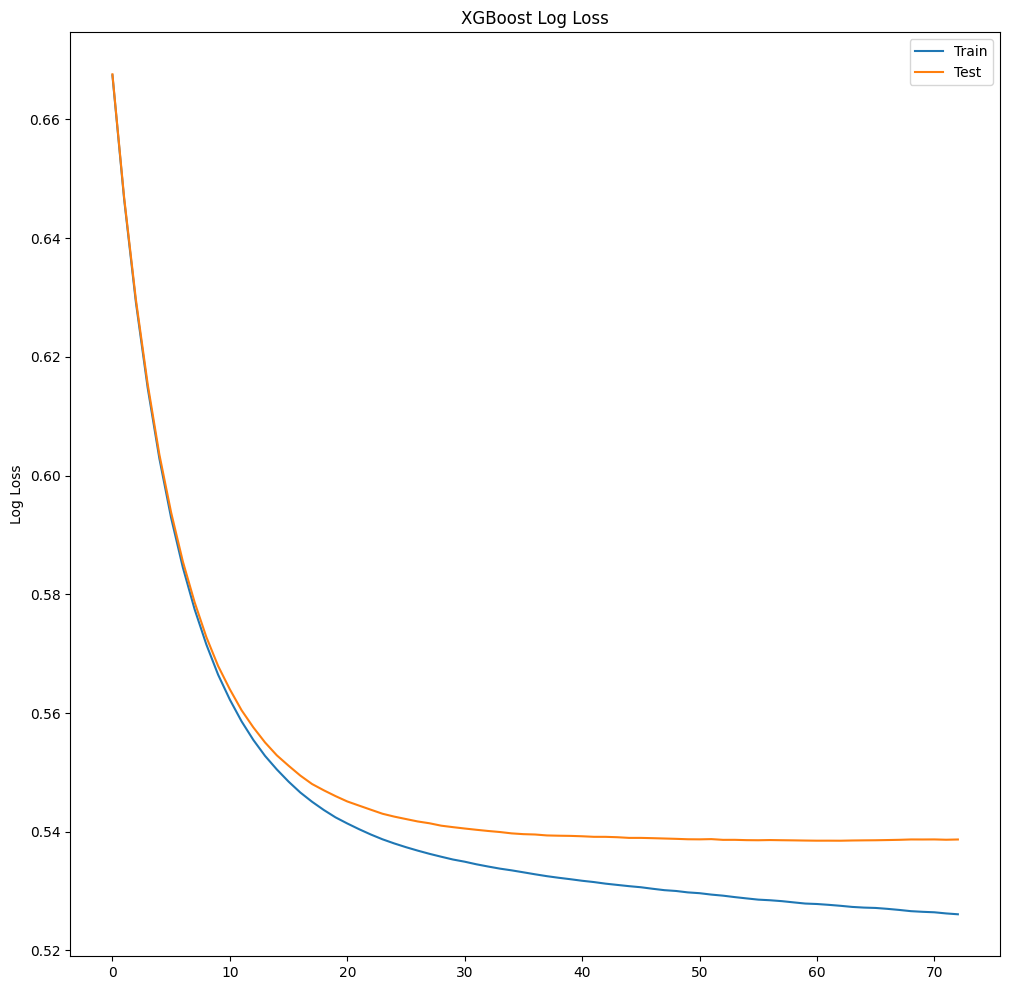

In [44]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = xgbmodel.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()

plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

## Classification Report & Confussion Matrix

In [45]:
print(classification_report(y_test, y_predXgb))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



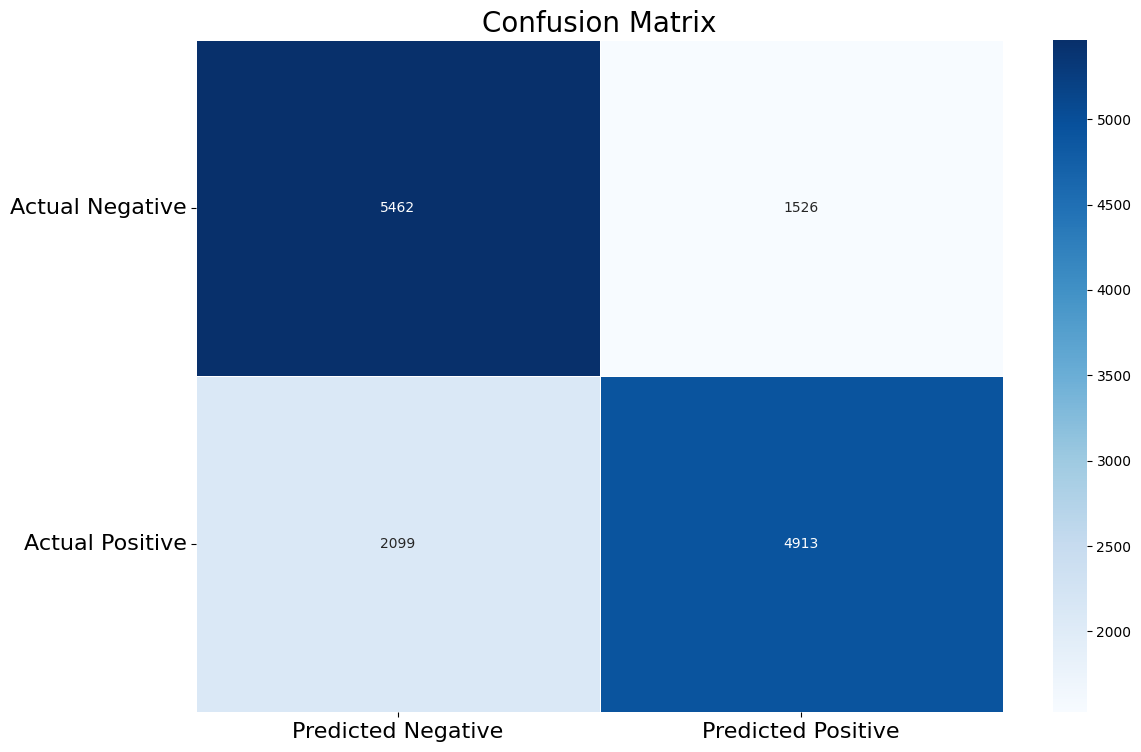

In [46]:
matrix = confusion_matrix(y_test, y_predXgb)

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(matrix, annot =True, fmt = "d", linewidths = 0.5, ax=ax, cmap='Blues')
plt.title(f"Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Predicted Negative', 'Predicted Positive'], fontsize=16, rotation=360)
ax.set_yticklabels(['Actual Negative', 'Actual Positive'], fontsize=16, rotation=360)
plt.show()

Berikut ini penjabaran masing-masing nilai pada report:
- Precision untuk kelas 0: 0,72
Precision untuk kelas 1: 0,76
Presisi adalah rasio kejadian kelas 0 yang diprediksi dengan benar terhadap total kejadian kelas 0 yang diprediksi. Dalam hal ini, dari semua kejadian yang diprediksi sebagai kelas 0, 72% dan 76% pada kelas 1 adalah benar.
- Recall untuk kelas 0: 0,78
Recall untuk kelas 1: 0,70
Perolehan kembali (juga dikenal sebagai sensitivitas atau tingkat positif sebenarnya) adalah rasio kejadian kelas 0 yang diprediksi dengan benar terhadap total kejadian aktual kelas 0. Dalam hal ini, 78% dari semua kejadian aktual kelas 0 diprediksi dengan benar dan untuk kelas 1 70% diprediksi dengan benar.
- Skor F1 untuk kelas 0: 0,75
Skor F1 untuk kelas 1: 0,73
Skor F1 adalah rata-rata harmonik antara presisi dan perolehan. Ini memberikan metrik tunggal yang menyeimbangkan presisi dan perolehan. Skor F1 sebesar 0,75 untuk kelas 0 menunjukkan keseimbangan yang baik antara presisi dan perolehan untuk kelas 0. Skor F1 untuk kelas 1 ialah sebesar 73% menunjukan pula keseimbangan yang baik antara presisi dan perolehan untuk kelas 1.
- Dukungan untuk kelas 0: 6988
Dukungan untuk kelas 1: 7012
Dukungannya adalah jumlah instance masing masing kelas sebenarnya dalam kumpulan data.
- "Akurasi" adalah ukuran kinerja model secara keseluruhan dan sama dengan 0,74, yang berarti bahwa model mengklasifikasikan 74% dari total contoh dengan benar.
- "Rata-rata makro" menghitung rata-rata presisi, perolehan, dan skor F1 di kedua kelas. Dalam hal ini, nilainya 0,74.
- "Rata-rata tertimbang" menghitung rata-rata presisi, perolehan, dan skor F1, yang diberi bobot berdasarkan jumlah instance untuk setiap kelas. Ini juga 0,74 dalam kasus ini.
- "Rata-rata tertimbang" menghitung rata-rata presisi, perolehan, dan skor F1, yang diberi bobot berdasarkan jumlah instance untuk setiap kelas. Ini juga 0,74 dalam kasus ini.
- Secara keseluruhan, tampaknya model memiliki performa yang cukup baik dengan presisi, perolehan, dan skor F1 yang serupa untuk kedua kelas. Akurasi sebesar 74% menunjukkan bahwa ia membuat prediksi yang akurat pada sebagian besar kasus. Namun, interpretasi spesifik dari metrik ini bergantung pada konteks masalah klasifikasi dan prioritas terkait presisi dan perolehan.

## ROC

ROC AUC (Receiver Operating Characteristic - Area Under the Curve) adalah metrik evaluasi yang digunakan untuk mengukur kinerja model klasifikasi, khususnya dalam konteks klasifikasi biner. Metrik ini mengukur sejauh mana model mampu membedakan antara dua kelas (biasanya kelas positif dan kelas negatif) dan seberapa baik model mengklasifikasikan instansi positif lebih tinggi daripada negatif.
- Receiver Operating Characteristic (ROC) adalah sebuah kurva yang menggambarkan hubungan antara tingkat True Positive Rate (TPR) dan tingkat False Positive Rate (FPR) pada berbagai ambang batas (threshold) pengambilan keputusan. TPR juga dikenal sebagai Sensitivity atau Recall, sedangkan FPR adalah 1 minus Specificity.
- Area Under the Curve (AUC) adalah area di bawah kurva ROC. Nilai AUC berkisar antara 0 hingga 1, di mana nilai 0.5 menunjukkan performa yang sama dengan model acak, dan nilai mendekati 1 menunjukkan performa yang sangat baik.

Text(0.5, 0, 'False Positive Rate')

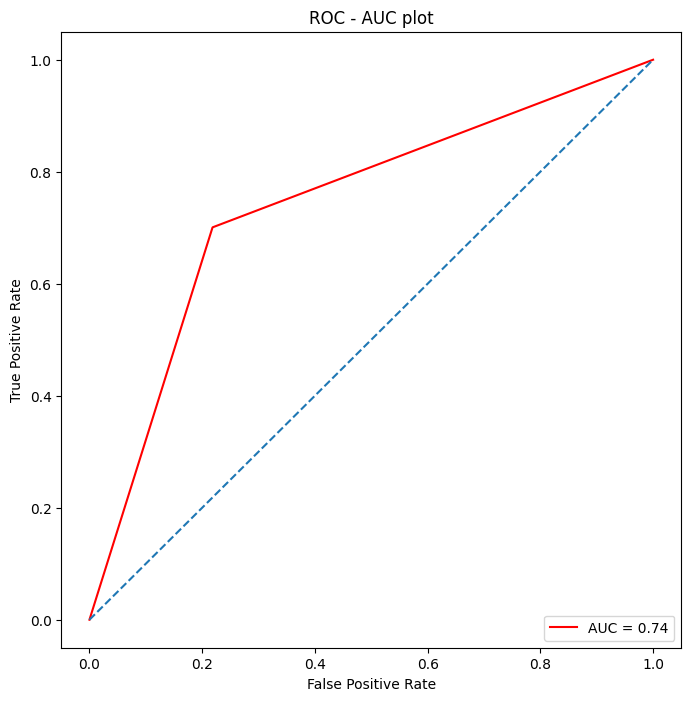

In [47]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predXgb)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(8,8))

plt.title('ROC - AUC plot')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Dilihat pada ROC-AUC plot tersebut nilai ROC AUC > 0.5 yang dimana dapat dikatakan baik dalam membedakan antara kelas positif dan negatif.

<h1 align='center'>References</h1>

***
[1]	B. Dahlöf, “Cardiovascular Disease Risk Factors: Epidemiology and Risk Assessment,” Am J Cardiol, vol. 105, no. 1, pp. 3A-9A, Jan. 2010, doi: 10.1016/J.AMJCARD.2009.10.007.

[2]	T. V. Jardim et al., “Multiple cardiovascular risk factors in adolescents from a middle-income country: Prevalence and associated factors,” PLoS One, vol. 13, no. 7, Jul. 2018, doi: 10.1371/journal.pone.0200075.

[3]	A. Khosravi et al., “The Relationship between Weight and CVD Risk Factors in a Sample Population from Central Iran (Based on IHHP).”

[4]	B. Riegel et al., “Self-care for the prevention and management of cardiovascular disease and stroke: A scientific statement for healthcare professionals from the American heart association,” J Am Heart Assoc, vol. 6, no. 9, Sep. 2017, doi: 10.1161/JAHA.117.006997.

[5]	S. Subramani et al., “Cardiovascular diseases prediction by machine learning incorporation with deep learning,” Front Med (Lausanne), vol. 10, 2023, doi: 10.3389/fmed.2023.1150933.